# Final Project - Exploratory Data Analysis
* This notebook explores the data set for the Final Project
* Currently there are 3 sections one for each use case

In [0]:
%fs ls /mnt/data/2023-kaggle-final

path name size modificationTime dbfs:/mnt/data/2023-kaggle-final/energy-prediction/ energy-prediction/ 0 1701526952735 dbfs:/mnt/data/2023-kaggle-final/nfl-dataset/ nfl-dataset/ 0 1701526952735 dbfs:/mnt/data/2023-kaggle-final/store-sales/ store-sales/ 0 1701526952735

## Store-Sales Data Set

In [0]:
%python
dbutils.fs.ls("dbfs:/mnt/data/2023-kaggle-final/store-sales/")

[FileInfo(path='dbfs:/mnt/data/2023-kaggle-final/store-sales/holidays_events.csv', name='holidays_events.csv', size=22309, modificationTime=1700423440000),
 FileInfo(path='dbfs:/mnt/data/2023-kaggle-final/store-sales/oil.csv', name='oil.csv', size=20580, modificationTime=1700423440000),
 FileInfo(path='dbfs:/mnt/data/2023-kaggle-final/store-sales/sample_submission.csv', name='sample_submission.csv', size=342153, modificationTime=1700423440000),
 FileInfo(path='dbfs:/mnt/data/2023-kaggle-final/store-sales/stores.csv', name='stores.csv', size=1387, modificationTime=1700423439000),
 FileInfo(path='dbfs:/mnt/data/2023-kaggle-final/store-sales/test.csv', name='test.csv', size=1022269, modificationTime=1700423439000),
 FileInfo(path='dbfs:/mnt/data/2023-kaggle-final/store-sales/train.csv', name='train.csv', size=121800373, modificationTime=1700423435000),
 FileInfo(path='dbfs:/mnt/data/2023-kaggle-final/store-sales/transactions.csv', name='transactions.csv', size=1552637, modificationTime=17

In [0]:
holiday_events_df = spark.read.option("header", True).option("inferSchema",True).csv("dbfs:/mnt/data/2023-kaggle-final/store-sales/holidays_events.csv")
oil_df = spark.read.option("header", True).option("inferSchema",True).csv("dbfs:/mnt/data/2023-kaggle-final/store-sales/oil.csv")
stores_df = spark.read.option("header", True).option("inferSchema",True).csv("dbfs:/mnt/data/2023-kaggle-final/store-sales/stores.csv")
transactions_df = spark.read.option("header", True).option("inferSchema",True).csv("dbfs:/mnt/data/2023-kaggle-final/store-sales/transactions.csv")

In [0]:
holiday_events_df.show(5)

+----------+-------+--------+-----------+--------------------+-----------+
|      date|   type|  locale|locale_name|         description|transferred|
+----------+-------+--------+-----------+--------------------+-----------+
|2012-03-02|Holiday|   Local|      Manta|  Fundacion de Manta|      false|
|2012-04-01|Holiday|Regional|   Cotopaxi|Provincializacion...|      false|
|2012-04-12|Holiday|   Local|     Cuenca| Fundacion de Cuenca|      false|
|2012-04-14|Holiday|   Local|   Libertad|Cantonizacion de ...|      false|
|2012-04-21|Holiday|   Local|   Riobamba|Cantonizacion de ...|      false|
+----------+-------+--------+-----------+--------------------+-----------+
only showing top 5 rows



In [0]:
oil_df.show(5) # oil prices on that day

+----------+----------+
|      date|dcoilwtico|
+----------+----------+
|2013-01-01|      NULL|
|2013-01-02|     93.14|
|2013-01-03|     92.97|
|2013-01-04|     93.12|
|2013-01-07|      93.2|
+----------+----------+
only showing top 5 rows



In [0]:
stores_df.show(5)

+---------+-------------+--------------------+----+-------+
|store_nbr|         city|               state|type|cluster|
+---------+-------------+--------------------+----+-------+
|        1|        Quito|           Pichincha|   D|     13|
|        2|        Quito|           Pichincha|   D|     13|
|        3|        Quito|           Pichincha|   D|      8|
|        4|        Quito|           Pichincha|   D|      9|
|        5|Santo Domingo|Santo Domingo de ...|   D|      4|
+---------+-------------+--------------------+----+-------+
only showing top 5 rows



In [0]:
transactions_df.show(5)

+----------+---------+------------+
|      date|store_nbr|transactions|
+----------+---------+------------+
|2013-01-01|       25|         770|
|2013-01-02|        1|        2111|
|2013-01-02|        2|        2358|
|2013-01-02|        3|        3487|
|2013-01-02|        4|        1922|
+----------+---------+------------+
only showing top 5 rows



In [0]:
holiday_events_df.createTempView("holiday_events_v")

In [0]:
%sql
SELECT * FROM holiday_events LIMIT 100

date type locale locale_name description transferred 2012-03-02 Holiday Local Manta Fundacion de Manta false 2012-04-01 Holiday Regional Cotopaxi Provincializacion de Cotopaxi false 2012-04-12 Holiday Local Cuenca Fundacion de Cuenca false 2012-04-14 Holiday Local Libertad Cantonizacion de Libertad false 2012-04-21 Holiday Local Riobamba Cantonizacion de Riobamba false 2012-05-12 Holiday Local Puyo Cantonizacion del Puyo false 2012-06-23 Holiday Local Guaranda Cantonizacion de Guaranda false 2012-06-25 Holiday Regional Imbabura Provincializacion de Imbabura false 2012-06-25 Holiday Local Latacunga Cantonizacion de Latacunga false 2012-06-25 Holiday Local Machala Fundacion de Machala false 2012-07-03 Holiday Local Santo Domingo Fundacion de Santo Domingo false 2012-07-03 Holiday Local El Carmen Cantonizacion de El Carmen false 2012-07-23 Holiday Local Cayambe Cantonizacion de Cayambe false 2012-08-05 Holiday Local Esmeraldas Fundacion de Esmeraldas false 2012-08-10 Holiday National Ecuador Primer Grito de Independencia false 2012-08-15 Holiday Local Riobamba Fundacion de Riobamba false 2012-08-24 Holiday Local Ambato Fundacion de Ambato false 2012-09-28 Holiday Local Ibarra Fundacion de Ibarra false 2012-10-07 Holiday Local Quevedo Cantonizacion de Quevedo false 2012-10-09 Holiday National Ecuador Independencia de Guayaquil true 2012-10-12 Transfer National Ecuador Traslado Independencia de Guayaquil false 2012-11-02 Holiday National Ecuador Dia de Difuntos false 2012-11-03 Holiday National Ecuador Independencia de Cuenca false 2012-11-06 Holiday Regional Santo Domingo de los Tsachilas Provincializacion de Santo Domingo false 2012-11-07 Holiday Regional Santa Elena Provincializacion Santa Elena false 2012-11-10 Holiday Local Guaranda Independencia de Guaranda false 2012-11-11 Holiday Local Latacunga Independencia de Latacunga false 2012-11-12 Holiday Local Ambato Independencia de Ambato false 2012-12-05 Additional Local Quito Fundacion de Quito-1 false 2012-12-06 Holiday Local Quito Fundacion de Quito false 2012-12-08 Holiday Local Loja Fundacion de Loja false 2012-12-21 Additional National Ecuador Navidad-4 false 2012-12-22 Holiday Local Salinas Cantonizacion de Salinas false 2012-12-22 Additional National Ecuador Navidad-3 false 2012-12-23 Additional National Ecuador Navidad-2 false 2012-12-24 Bridge National Ecuador Puente Navidad false 2012-12-24 Additional National Ecuador Navidad-1 false 2012-12-25 Holiday National Ecuador Navidad false 2012-12-26 Additional National Ecuador Navidad+1 false 2012-12-31 Bridge National Ecuador Puente Primer dia del ano false 2012-12-31 Additional National Ecuador Primer dia del ano-1 false 2013-01-01 Holiday National Ecuador Primer dia del ano false 2013-01-05 Work Day National Ecuador Recupero puente Navidad false 2013-01-12 Work Day National Ecuador Recupero puente primer dia del ano false 2013-02-11 Holiday National Ecuador Carnaval false 2013-02-12 Holiday National Ecuador Carnaval false 2013-03-02 Holiday Local Manta Fundacion de Manta false 2013-04-01 Holiday Regional Cotopaxi Provincializacion de Cotopaxi false 2013-04-12 Holiday Local Cuenca Fundacion de Cuenca false 2013-04-14 Holiday Local Libertad Cantonizacion de Libertad false 2013-04-21 Holiday Local Riobamba Cantonizacion de Riobamba false 2013-04-29 Holiday National Ecuador Viernes Santo false 2013-05-01 Holiday National Ecuador Dia del Trabajo false 2013-05-11 Additional National Ecuador Dia de la Madre-1 false 2013-05-12 Holiday Local Puyo Cantonizacion del Puyo false 2013-05-12 Event National Ecuador Dia de la Madre false 2013-05-24 Holiday National Ecuador Batalla de Pichincha false 2013-06-23 Holiday Local Guaranda Cantonizacion de Guaranda false 2013-06-25 Holiday Regional Imbabura Provincializacion de Imbabura false 2013-06-25 Holiday Local Machala Fundacion de Machala false 2013-06-25 Holiday Local Latacunga Cantonizacion de Latacunga false 2013-07-03 Holiday Local El Carmen Cantonizacion de El Carmen false 2013-07-0

In [0]:
%sql
SELECT extract( YEAR from `date`) as Yr, `locale` , COUNT(*) from holiday_events group by Yr,`locale` order by Yr

Yr locale count(1) 2012 Regional 4 2012 Local 23 2012 National 14 2013 National 22 2013 Local 25 2013 Regional 4 2014 National 38 2014 Regional 4 2014 Local 25 2015 Local 25 2015 Regional 4 2015 National 23 2016 National 56 2016 Regional 4 2016 Local 26 2017 Local 28 2017 Regional 4 2017 National 21

In [0]:
%sql
SELECT extract( YEAR from `date`) as Yr, COUNT(*) from holiday_events group by Yr order by Yr

Yr count(1) 2012 41 2013 51 2014 67 2015 52 2016 86 2017 53

* there are 7 files `holidays_events.csv`, `oil.csv`,`sample_submission.csv`,`stores.csv`,`test.csv`, `train.csv`, `transactions.csv`
* all of them are `csv` type
* Timeline years is between 2013 and 2017 (including )

### Holiday Events Observations
* Most of the holidays are **Local** and **National** holidays, very less on **Regional**
* Partition can be based on Year part of the date

In [0]:
oil_df.createTempView("oil")

In [0]:
%sql
SELECT * FROM oil LIMIT 3

date dcoilwtico 2013-01-01 null 2013-01-02 93.14 2013-01-03 92.97

In [0]:
%sql
SELECT COUNT(*) as cnt_of_records FROM oil;
SELECT extract(YEAR FROM `date`) as yr FROM oil GROUP BY yr order by yr desc;


yr 2017 2016 2015 2014 2013

In [0]:
transactions_df.createTempView("transactions")

In [0]:
%sql
SELECT * FROM transactions LIMIT 2;

date store_nbr transactions 2013-01-01 25 770 2013-01-02 1 2111

In [0]:
%sql
SELECT `store_nbr` , count(*) FROM transactions GROUP BY `store_nbr` ORDER BY 1

store_nbr count(1) 1 1676 2 1677 3 1676 4 1676 5 1677 6 1676 7 1675 8 1676 9 1676 10 1675 11 1676 12 1616 13 1676 14 1638 15 1676 16 1677 17 1674 18 1566 19 1676 20 909 21 748 22 671 23 1677 24 1577 25 1615 26 1678 27 1677 28 1677 29 874 30 1655 31 1678 32 1677 33 1678 34 1678 35 1676 36 1551 37 1678 38 1678 39 1678 40 1677 41 1677 42 720 43 1672 44 1677 45 1677 46 1677 47 1677 48 1677 49 1677 50 1677 51 1677 52 118 53 1167 54 1676

In [0]:
store_nbr = spark.sql("select distinct(`store_nbr`) from transactions").rdd.map(lambda row : row[0]).collect()
store_nbr.sort()
dbutils.widgets.dropdown("store_numb", "1", [str(x) for x in store_nbr])

In [0]:
databaseName = "final_project_group_5"
spark.sql(f"CREATE DATABASE IF NOT EXISTS {databaseName}")
spark.sql(f"use {databaseName}")

DataFrame[]

In [0]:
%sql
-- CREATE CATALOG IF NOT EXISTS final_project_group_5;

In [0]:
%sql
SELECT (concat(extract(YEAR from `date`),"-", lpad(extract(MONTH from `date`),2,'0'))) as yr_mnt, sum(`transactions`) FROM transactions where store_nbr = getArgument("store_numb") group by yr_mnt order by yr_mnt

yr_mnt sum(transactions) 2013-01 52902 2013-02 48108 2013-03 56606 2013-04 53344 2013-05 55612 2013-06 55285 2013-07 54986 2013-08 55148 2013-09 54706 2013-10 54925 2013-11 53859 2013-12 67918 2014-01 54761 2014-02 51482 2014-03 56889 2014-04 56494 2014-05 57868 2014-06 56183 2014-07 54976 2014-08 55904 2014-09 55589 2014-10 55913 2014-11 54564 2014-12 66683 2015-01 55471 2015-02 49542 2015-03 56386 2015-04 54755 2015-05 57297 2015-06 54223 2015-07 55388 2015-08 54635 2015-09 53666 2015-10 54649 2015-11 53112 2015-12 67161 2016-01 49912 2016-02 52527 2016-03 56137 2016-04 56737 2016-05 56323 2016-06 53570 2016-07 54501 2016-08 52190 2016-09 52241 2016-10 54278 2016-11 52608 2016-12 65363 2017-01 54087 2017-02 50351 2017-03 54654 2017-04 53831 2017-05 54984 2017-06 53766 2017-07 55227 2017-08 25619

Business Use Case : 

1) Whether the promotion increase the sales
2) Predicting the Sales using Oil Price 

In [0]:
train_df = spark.read.option("header", True).option("inferSchema",True).csv("dbfs:/mnt/data/2023-kaggle-final/store-sales/train.csv")

In [0]:
display(train_df)

id date store_nbr family sales onpromotion 0 2013-01-01 1 AUTOMOTIVE 0.0 0 1 2013-01-01 1 BABY CARE 0.0 0 2 2013-01-01 1 BEAUTY 0.0 0 3 2013-01-01 1 BEVERAGES 0.0 0 4 2013-01-01 1 BOOKS 0.0 0 5 2013-01-01 1 BREAD/BAKERY 0.0 0 6 2013-01-01 1 CELEBRATION 0.0 0 7 2013-01-01 1 CLEANING 0.0 0 8 2013-01-01 1 DAIRY 0.0 0 9 2013-01-01 1 DELI 0.0 0 10 2013-01-01 1 EGGS 0.0 0 11 2013-01-01 1 FROZEN FOODS 0.0 0 12 2013-01-01 1 GROCERY I 0.0 0 13 2013-01-01 1 GROCERY II 0.0 0 14 2013-01-01 1 HARDWARE 0.0 0 15 2013-01-01 1 HOME AND KITCHEN I 0.0 0 16 2013-01-01 1 HOME AND KITCHEN II 0.0 0 17 2013-01-01 1 HOME APPLIANCES 0.0 0 18 2013-01-01 1 HOME CARE 0.0 0 19 2013-01-01 1 LADIESWEAR 0.0 0 20 2013-01-01 1 LAWN AND GARDEN 0.0 0 21 2013-01-01 1 LINGERIE 0.0 0 22 2013-01-01 1 LIQUOR,WINE,BEER 0.0 0 23 2013-01-01 1 MAGAZINES 0.0 0 24 2013-01-01 1 MEATS 0.0 0 25 2013-01-01 1 PERSONAL CARE 0.0 0 26 2013-01-01 1 PET SUPPLIES 0.0 0 27 2013-01-01 1 PLAYERS AND ELECTRONICS 0.0 0 28 2013-01-01 1 POULTRY 0.0 0 29 2013-01-01 1 PREPARED FOODS 0.0 0 30 2013-01-01 1 PRODUCE 0.0 0 31 2013-01-01 1 SCHOOL AND OFFICE SUPPLIES 0.0 0 32 2013-01-01 1 SEAFOOD 0.0 0 33 2013-01-01 10 AUTOMOTIVE 0.0 0 34 2013-01-01 10 BABY CARE 0.0 0 35 2013-01-01 10 BEAUTY 0.0 0 36 2013-01-01 10 BEVERAGES 0.0 0 37 2013-01-01 10 BOOKS 0.0 0 38 2013-01-01 10 BREAD/BAKERY 0.0 0 39 2013-01-01 10 CELEBRATION 0.0 0 40 2013-01-01 10 CLEANING 0.0 0 41 2013-01-01 10 DAIRY 0.0 0 42 2013-01-01 10 DELI 0.0 0 43 2013-01-01 10 EGGS 0.0 0 44 2013-01-01 10 FROZEN FOODS 0.0 0 45 2013-01-01 10 GROCERY I 0.0 0 46 2013-01-01 10 GROCERY II 0.0 0 47 2013-01-01 10 HARDWARE 0.0 0 48 2013-01-01 10 HOME AND KITCHEN I 0.0 0 49 2013-01-01 10 HOME AND KITCHEN II 0.0 0 50 2013-01-01 10 HOME APPLIANCES 0.0 0 51 2013-01-01 10 HOME CARE 0.0 0 52 2013-01-01 10 LADIESWEAR 0.0 0 53 2013-01-01 10 LAWN AND GARDEN 0.0 0 54 2013-01-01 10 LINGERIE 0.0 0 55 2013-01-01 10 LIQUOR,WINE,BEER 0.0 0 56 2013-01-01 10 MAGAZINES 0.0 0 57 2013-01-01 10 MEATS 0.0 0 58 2013-01-01 10 PERSONAL CARE 0.0 0 59 2013-01-01 10 PET SUPPLIES 0.0 0 60 2013-01-01 10 PLAYERS AND ELECTRONICS 0.0 0 61 2013-01-01 10 POULTRY 0.0 0 62 2013-01-01 10 PREPARED FOODS 0.0 0 63 2013-01-01 10 PRODUCE 0.0 0 64 2013-01-01 10 SCHOOL AND OFFICE SUPPLIES 0.0 0 65 2013-01-01 10 SEAFOOD 0.0 0 66 2013-01-01 11 AUTOMOTIVE 0.0 0 67 2013-01-01 11 BABY CARE 0.0 0 68 2013-01-01 11 BEAUTY 0.0 0 69 2013-01-01 11 BEVERAGES 0.0 0 70 2013-01-01 11 BOOKS 0.0 0 71 2013-01-01 11 BREAD/BAKERY 0.0 0 72 2013-01-01 11 CELEBRATION 0.0 0 73 2013-01-01 11 CLEANING 0.0 0 74 2013-01-01 11 DAIRY 0.0 0 75 2013-01-01 11 DELI 0.0 0 76 2013-01-01 11 EGGS 0.0 0 77 2013-01-01 11 FROZEN FOODS 0.0 0 78 2013-01-01 11 GROCERY I 0.0 0 79 2013-01-01 11 GROCERY II 0.0 0 80 2013-01-01 11 HARDWARE 0.0 0 81 2013-01-01 11 HOME AND KITCHEN I 0.0 0 82 2013-01-01 11 HOME AND KITCHEN II 0.0 0 83 2013-01-01 11 HOME APPLIANCES 0.0 0 84 2013-01-01 11 HOME CARE 0.0 0 85 2013-01-01 11 LADIESWEAR 0.0 0 86 2013-01-01 11 LAWN AND GARDEN 0.0 0 87 2013-01-01 11 LINGERIE 0.0 0 88 2013-01-01 11 LIQUOR,WINE,BEER 0.0 0 89 2013-01-01 11 MAGAZINES 0.0 0 90 2013-01-01 11 MEATS 0.0 0 91 2013-01-01 11 PERSONAL CARE 0.0 0 92 2013-01-01 11 PET SUPPLIES 0.0 0 93 2013-01-01 11 PLAYERS AND ELECTRONICS 0.0 0 94 2013-01-01 11 POULTRY 0.0 0 95 2013-01-01 11 PREPARED FOODS 0.0 0 96 2013-01-01 11 PRODUCE 0.0 0 97 2013-01-01 11 SCHOOL AND OFFICE SUPPLIES 0.0 0 98 2013-01-01 11 SEAFOOD 0.0 0 99 2013-01-01 12 AUTOMOTIVE 0.0 0 100 2013-01-01 12 BABY CARE 0.0 0 101 2013-01-01 12 BEAUTY 0.0 0 102 2013-01-01 12 BEVERAGES 0.0 0 103 2013-01-01 12 BOOKS 0.0 0 104 2013-01-01 12 BREAD/BAKERY 0.0 0 105 2013-01-01 12 CELEBRATION 0.0 0 106 2013-01-01 12 CLEANING 0.0 0 107 2013-01-01 12 DAIRY 0.0 0 108 2013-01-01 12 DELI 0.0 0 109 2013-01-01 12 EGGS 0.0 0 110 2013-01-01 12 FROZEN FOODS 0.0 0 111 2013-01-01 12 GROCERY I 0.0 0 112 2013-01-01 12 GROCERY II 0.0 0 113 2013-01-01 12 HARDWARE 0.0 0 114 2013-01-01 12 HOME AND KITCHEN I 0.0 0 115 2013-01-01 12 HO

In [0]:
train_df.createTempView("train_table")

In [0]:
%sql
select onpromotion from train_table group by onpromotion

onpromotion 0 148 31 137 65 53 133 78 155 108 34 193 101 126 115 81 28 183 76 26 27 44 192 159 103 12 91 22 128 122 93 157 190 111 47 140 177 132 152 185 146 1 206 52 182 13 6 16 86 168 205 3 178 142 20 40 164 169 139 94 57 54 120 96 48 5 163 191 19 92 64 117 41 154 15 43 112 165 179 189 37 61 88 197 107 202 17 9 72 175 35 196 173 114 4 59 55 8 100 161 39 23 49 176 7 162 130 84 136 87 171 51 194 166 69 129 97 63 10 102 77 50 45 38 181 82 167 80 25 73 113 24 160 70 121 62 125 156 143 95 29 21 98 195 32 60 90 75 141 151 145 200 56 109 170 105 58 188 11 33 204 110 150 83 68 106 71 116 147 14 198 123 158 199 135 42 119 2 79 201 149 131 118 124 30 99 184 66 46 186 67 174 172 153 144 18 74 138 104 180 134 36 187 89 496 243 85 481 255 322 633 211 642 210 300 332 626 253 223 333 222 285 209 230 225 233 476 224 444 305 435 473 259 512 297 212 218 474 470 479 283 306 646 235 452 507 258 279 299 644 227 511 269 207 489 383 127 547 231 609 286 677 485 217 441 290 229 326 307 220 684 241 717 719 520 672 629 446 624 720 664 247 277 543 264 312 293 216 261 320 510 289 240 245 237 219 226 741 528 464 214 710 678 630 469 203 221 639 254 213 228 655 718 702 304 668 536 726 317 600 657 424 342 276 294 722 281 302 313 282 275 628 215 716 551 252 420 208 251 236 330 232 539 246 519 250 425 486 263 244 238 391 467 234 239 249 591 697 411 242 248 407

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
pandas_df = train_df.toPandas()

<Figure size 1000x1000 with 20 Axes>

In [0]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int32  
 1   date         object 
 2   store_nbr    int32  
 3   family       object 
 4   sales        float64
 5   onpromotion  int32  
dtypes: float64(1), int32(3), object(2)
memory usage: 103.0+ MB


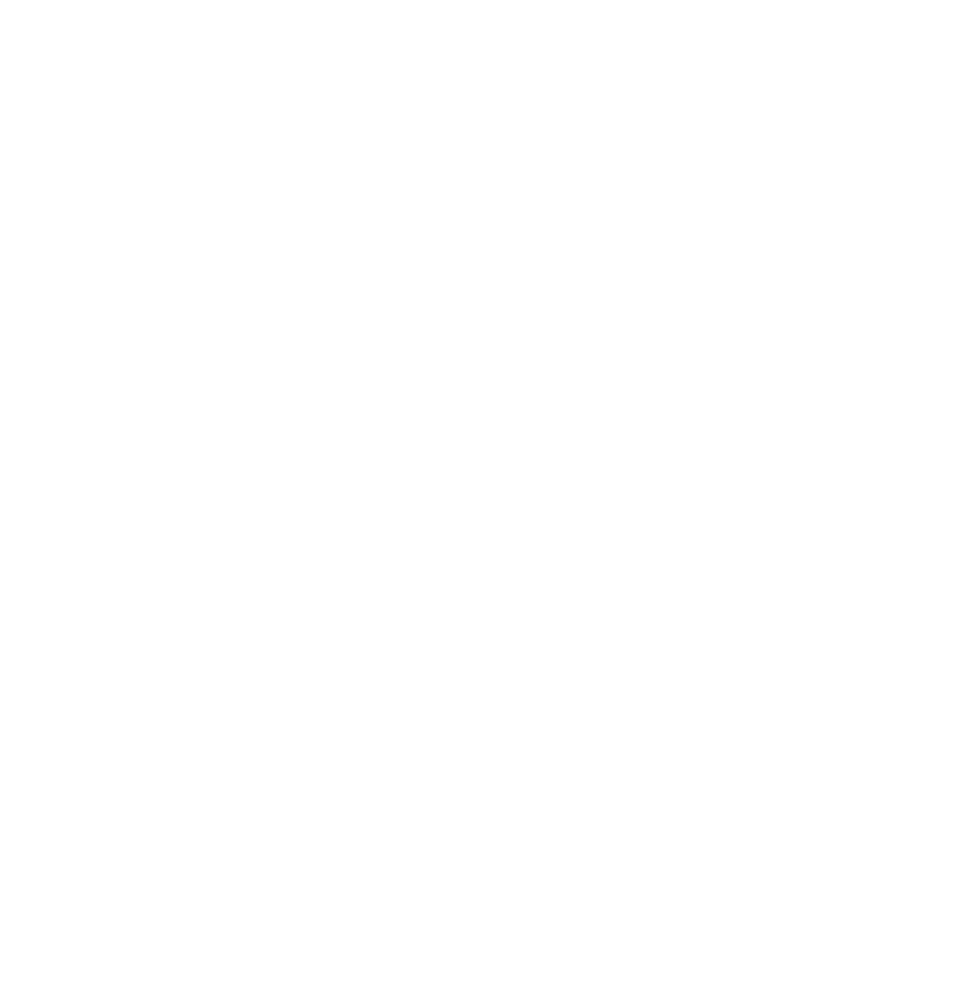

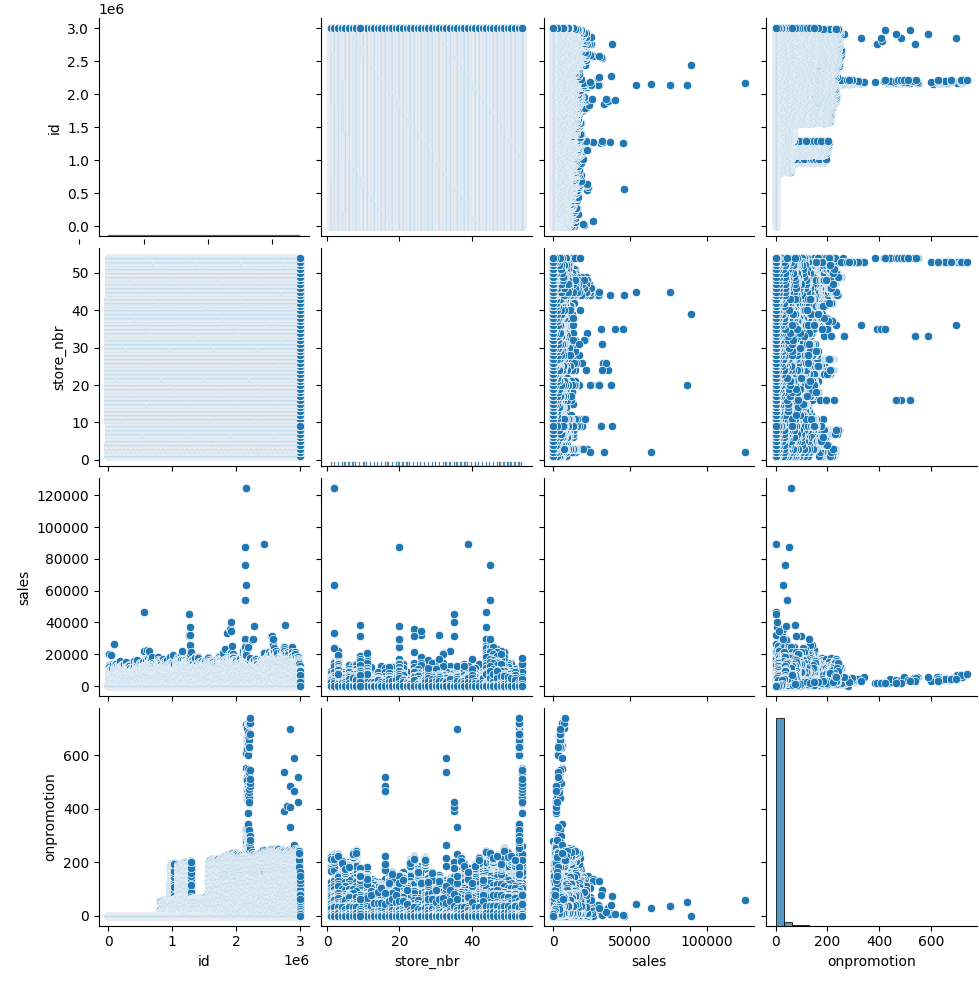

In [0]:
sns.pairplot(pandas_df)
plt.show()

In [0]:
#Join Oil Dataset with Train DF based on Date

In [0]:
display(oil_df)

date dcoilwtico 2013-01-01 null 2013-01-02 93.14 2013-01-03 92.97 2013-01-04 93.12 2013-01-07 93.2 2013-01-08 93.21 2013-01-09 93.08 2013-01-10 93.81 2013-01-11 93.6 2013-01-14 94.27 2013-01-15 93.26 2013-01-16 94.28 2013-01-17 95.49 2013-01-18 95.61 2013-01-21 null 2013-01-22 96.09 2013-01-23 95.06 2013-01-24 95.35 2013-01-25 95.15 2013-01-28 95.95 2013-01-29 97.62 2013-01-30 97.98 2013-01-31 97.65 2013-02-01 97.46 2013-02-04 96.21 2013-02-05 96.68 2013-02-06 96.44 2013-02-07 95.84 2013-02-08 95.71 2013-02-11 97.01 2013-02-12 97.48 2013-02-13 97.03 2013-02-14 97.3 2013-02-15 95.95 2013-02-18 null 2013-02-19 96.69 2013-02-20 94.92 2013-02-21 92.79 2013-02-22 93.12 2013-02-25 92.74 2013-02-26 92.63 2013-02-27 92.84 2013-02-28 92.03 2013-03-01 90.71 2013-03-04 90.13 2013-03-05 90.88 2013-03-06 90.47 2013-03-07 91.53 2013-03-08 92.01 2013-03-11 92.07 2013-03-12 92.44 2013-03-13 92.47 2013-03-14 93.03 2013-03-15 93.49 2013-03-18 93.71 2013-03-19 92.44 2013-03-20 93.21 2013-03-21 92.46 2013-03-22 93.41 2013-03-25 94.55 2013-03-26 95.99 2013-03-27 96.53 2013-03-28 97.24 2013-03-29 null 2013-04-01 97.1 2013-04-02 97.23 2013-04-03 95.02 2013-04-04 93.26 2013-04-05 92.76 2013-04-08 93.36 2013-04-09 94.18 2013-04-10 94.59 2013-04-11 93.44 2013-04-12 91.23 2013-04-15 88.75 2013-04-16 88.73 2013-04-17 86.65 2013-04-18 87.83 2013-04-19 88.04 2013-04-22 88.81 2013-04-23 89.21 2013-04-24 91.07 2013-04-25 93.27 2013-04-26 92.63 2013-04-29 94.09 2013-04-30 93.22 2013-05-01 90.74 2013-05-02 93.7 2013-05-03 95.25 2013-05-06 95.8 2013-05-07 95.28 2013-05-08 96.24 2013-05-09 96.09 2013-05-10 95.81 2013-05-13 94.76 2013-05-14 93.96 2013-05-15 93.95 2013-05-16 94.85 2013-05-17 95.72 2013-05-20 96.29 2013-05-21 95.55 2013-05-22 93.98 2013-05-23 94.12 2013-05-24 93.84 2013-05-27 null 2013-05-28 94.65 2013-05-29 93.13 2013-05-30 93.57 2013-05-31 91.93 2013-06-03 93.41 2013-06-04 93.36 2013-06-05 93.66 2013-06-06 94.71 2013-06-07 96.11 2013-06-10 95.82 2013-06-11 95.5 2013-06-12 95.98 2013-06-13 96.66 2013-06-14 97.83 2013-06-17 97.86 2013-06-18 98.46 2013-06-19 98.24 2013-06-20 94.89 2013-06-21 93.81 2013-06-24 95.07 2013-06-25 95.25 2013-06-26 95.47 2013-06-27 97.0 2013-06-28 96.36 2013-07-01 97.94 2013-07-02 99.65 2013-07-03 101.92 2013-07-04 null 2013-07-05 103.09 2013-07-08 103.03 2013-07-09 103.46 2013-07-10 106.41 2013-07-11 104.77 2013-07-12 105.85 2013-07-15 106.2 2013-07-16 105.88 2013-07-17 106.39 2013-07-18 107.94 2013-07-19 108.0 2013-07-22 106.61 2013-07-23 107.13 2013-07-24 105.41 2013-07-25 105.47 2013-07-26 104.76 2013-07-29 104.61 2013-07-30 103.14 2013-07-31 105.1 2013-08-01 107.93 2013-08-02 106.94 2013-08-05 106.61 2013-08-06 105.32 2013-08-07 104.41 2013-08-08 103.45 2013-08-09 106.04 2013-08-12 106.19 2013-08-13 106.78 2013-08-14 106.89 2013-08-15 107.43 2013-08-16 107.58 2013-08-19 107.14 2013-08-20 104.9 2013-08-21 103.93 2013-08-22 104.93 2013-08-23 106.48 2013-08-26 105.88 2013-08-27 109.11 2013-08-28 110.17 2013-08-29 108.51 2013-08-30 107.98 2013-09-02 null 2013-09-03 108.67 2013-09-04 107.29 2013-09-05 108.5 2013-09-06 110.62 2013-09-09 109.62 2013-09-10 107.48 2013-09-11 107.65 2013-09-12 108.72 2013-09-13 108.31 2013-09-16 106.54 2013-09-17 105.36 2013-09-18 108.23 2013-09-19 106.26 2013-09-20 104.7 2013-09-23 103.62 2013-09-24 103.22 2013-09-25 102.68 2013-09-26 103.1 2013-09-27 102.86 2013-09-30 102.36 2013-10-01 102.09 2013-10-02 104.15 2013-10-03 103.29 2013-10-04 103.83 2013-10-07 103.07 2013-10-08 103.54 2013-10-09 101.63 2013-10-10 103.08 2013-10-11 102.17 2013-10-14 102.46 2013-10-15 101.15 2013-10-16 102.34 2013-10-17 100.72 2013-10-18 100.87 2013-10-21 99.28 2013-10-22 97.63 2013-10-23 96.9 2013-10-24 96.65 2013-10-25 97.4 2013-10-28 98.74 2013-10-29 98.29 2013-10-30 96.81 2013-10-31 96.29 2013-11-01 94.56 2013-11-04 94.58 2013-11-05 93.4 2013-11-06 94.74 2013-11-07 94.25 2013-11-08 94.56 2013-11-11 95.13 2013-11-12 93.12 2013-11-13 93.91 2013-11-14 93.76 2013-11-15 93.8 2013-11-18 93.03 2013-11-19 93.35 2013-11

In [0]:
oil_df.describe()

DataFrame[summary: string, dcoilwtico: string]

In [0]:
train_df.describe()

DataFrame[summary: string, id: string, store_nbr: string, family: string, sales: string, onpromotion: string]

In [0]:
from pyspark.sql.functions import col
from pyspark.sql.functions import when


In [0]:

# Convert string date column to date type
df1 = oil_df.withColumn("date", col("date").cast("date"))
df2 = train_df.withColumn("date", col("date").cast("date"))

# Joining DataFrames on the 'date' column
joined_df = df1.join(df2, on='date', how='inner')

# Display the joined DataFrame
joined_df.show()

+----------+----------+---+---------+-------------------+-----+-----------+
|      date|dcoilwtico| id|store_nbr|             family|sales|onpromotion|
+----------+----------+---+---------+-------------------+-----+-----------+
|2013-01-01|      NULL|  0|        1|         AUTOMOTIVE|  0.0|          0|
|2013-01-01|      NULL|  1|        1|          BABY CARE|  0.0|          0|
|2013-01-01|      NULL|  2|        1|             BEAUTY|  0.0|          0|
|2013-01-01|      NULL|  3|        1|          BEVERAGES|  0.0|          0|
|2013-01-01|      NULL|  4|        1|              BOOKS|  0.0|          0|
|2013-01-01|      NULL|  5|        1|       BREAD/BAKERY|  0.0|          0|
|2013-01-01|      NULL|  6|        1|        CELEBRATION|  0.0|          0|
|2013-01-01|      NULL|  7|        1|           CLEANING|  0.0|          0|
|2013-01-01|      NULL|  8|        1|              DAIRY|  0.0|          0|
|2013-01-01|      NULL|  9|        1|               DELI|  0.0|          0|
|2013-01-01|

In [0]:
display(joined_df)

date dcoilwtico id store_nbr family sales onpromotion 2013-01-01 null 0 1 AUTOMOTIVE 0.0 0 2013-01-01 null 1 1 BABY CARE 0.0 0 2013-01-01 null 2 1 BEAUTY 0.0 0 2013-01-01 null 3 1 BEVERAGES 0.0 0 2013-01-01 null 4 1 BOOKS 0.0 0 2013-01-01 null 5 1 BREAD/BAKERY 0.0 0 2013-01-01 null 6 1 CELEBRATION 0.0 0 2013-01-01 null 7 1 CLEANING 0.0 0 2013-01-01 null 8 1 DAIRY 0.0 0 2013-01-01 null 9 1 DELI 0.0 0 2013-01-01 null 10 1 EGGS 0.0 0 2013-01-01 null 11 1 FROZEN FOODS 0.0 0 2013-01-01 null 12 1 GROCERY I 0.0 0 2013-01-01 null 13 1 GROCERY II 0.0 0 2013-01-01 null 14 1 HARDWARE 0.0 0 2013-01-01 null 15 1 HOME AND KITCHEN I 0.0 0 2013-01-01 null 16 1 HOME AND KITCHEN II 0.0 0 2013-01-01 null 17 1 HOME APPLIANCES 0.0 0 2013-01-01 null 18 1 HOME CARE 0.0 0 2013-01-01 null 19 1 LADIESWEAR 0.0 0 2013-01-01 null 20 1 LAWN AND GARDEN 0.0 0 2013-01-01 null 21 1 LINGERIE 0.0 0 2013-01-01 null 22 1 LIQUOR,WINE,BEER 0.0 0 2013-01-01 null 23 1 MAGAZINES 0.0 0 2013-01-01 null 24 1 MEATS 0.0 0 2013-01-01 null 25 1 PERSONAL CARE 0.0 0 2013-01-01 null 26 1 PET SUPPLIES 0.0 0 2013-01-01 null 27 1 PLAYERS AND ELECTRONICS 0.0 0 2013-01-01 null 28 1 POULTRY 0.0 0 2013-01-01 null 29 1 PREPARED FOODS 0.0 0 2013-01-01 null 30 1 PRODUCE 0.0 0 2013-01-01 null 31 1 SCHOOL AND OFFICE SUPPLIES 0.0 0 2013-01-01 null 32 1 SEAFOOD 0.0 0 2013-01-01 null 33 10 AUTOMOTIVE 0.0 0 2013-01-01 null 34 10 BABY CARE 0.0 0 2013-01-01 null 35 10 BEAUTY 0.0 0 2013-01-01 null 36 10 BEVERAGES 0.0 0 2013-01-01 null 37 10 BOOKS 0.0 0 2013-01-01 null 38 10 BREAD/BAKERY 0.0 0 2013-01-01 null 39 10 CELEBRATION 0.0 0 2013-01-01 null 40 10 CLEANING 0.0 0 2013-01-01 null 41 10 DAIRY 0.0 0 2013-01-01 null 42 10 DELI 0.0 0 2013-01-01 null 43 10 EGGS 0.0 0 2013-01-01 null 44 10 FROZEN FOODS 0.0 0 2013-01-01 null 45 10 GROCERY I 0.0 0 2013-01-01 null 46 10 GROCERY II 0.0 0 2013-01-01 null 47 10 HARDWARE 0.0 0 2013-01-01 null 48 10 HOME AND KITCHEN I 0.0 0 2013-01-01 null 49 10 HOME AND KITCHEN II 0.0 0 2013-01-01 null 50 10 HOME APPLIANCES 0.0 0 2013-01-01 null 51 10 HOME CARE 0.0 0 2013-01-01 null 52 10 LADIESWEAR 0.0 0 2013-01-01 null 53 10 LAWN AND GARDEN 0.0 0 2013-01-01 null 54 10 LINGERIE 0.0 0 2013-01-01 null 55 10 LIQUOR,WINE,BEER 0.0 0 2013-01-01 null 56 10 MAGAZINES 0.0 0 2013-01-01 null 57 10 MEATS 0.0 0 2013-01-01 null 58 10 PERSONAL CARE 0.0 0 2013-01-01 null 59 10 PET SUPPLIES 0.0 0 2013-01-01 null 60 10 PLAYERS AND ELECTRONICS 0.0 0 2013-01-01 null 61 10 POULTRY 0.0 0 2013-01-01 null 62 10 PREPARED FOODS 0.0 0 2013-01-01 null 63 10 PRODUCE 0.0 0 2013-01-01 null 64 10 SCHOOL AND OFFICE SUPPLIES 0.0 0 2013-01-01 null 65 10 SEAFOOD 0.0 0 2013-01-01 null 66 11 AUTOMOTIVE 0.0 0 2013-01-01 null 67 11 BABY CARE 0.0 0 2013-01-01 null 68 11 BEAUTY 0.0 0 2013-01-01 null 69 11 BEVERAGES 0.0 0 2013-01-01 null 70 11 BOOKS 0.0 0 2013-01-01 null 71 11 BREAD/BAKERY 0.0 0 2013-01-01 null 72 11 CELEBRATION 0.0 0 2013-01-01 null 73 11 CLEANING 0.0 0 2013-01-01 null 74 11 DAIRY 0.0 0 2013-01-01 null 75 11 DELI 0.0 0 2013-01-01 null 76 11 EGGS 0.0 0 2013-01-01 null 77 11 FROZEN FOODS 0.0 0 2013-01-01 null 78 11 GROCERY I 0.0 0 2013-01-01 null 79 11 GROCERY II 0.0 0 2013-01-01 null 80 11 HARDWARE 0.0 0 2013-01-01 null 81 11 HOME AND KITCHEN I 0.0 0 2013-01-01 null 82 11 HOME AND KITCHEN II 0.0 0 2013-01-01 null 83 11 HOME APPLIANCES 0.0 0 2013-01-01 null 84 11 HOME CARE 0.0 0 2013-01-01 null 85 11 LADIESWEAR 0.0 0 2013-01-01 null 86 11 LAWN AND GARDEN 0.0 0 2013-01-01 null 87 11 LINGERIE 0.0 0 2013-01-01 null 88 11 LIQUOR,WINE,BEER 0.0 0 2013-01-01 null 89 11 MAGAZINES 0.0 0 2013-01-01 null 90 11 MEATS 0.0 0 2013-01-01 null 91 11 PERSONAL CARE 0.0 0 2013-01-01 null 92 11 PET SUPPLIES 0.0 0 2013-01-01 null 93 11 PLAYERS AND ELECTRONICS 0.0 0 2013-01-01 null 94 11 POULTRY 0.0 0 2013-01-01 null 95 11 PREPARED FOODS 0.0 0 2013-01-01 null 96 11 PRODUCE 0.0 0 2013-01-01 null 97 11 SCHOOL AND OFFICE SUPPLIES 0.0 0 2013-01-01 null 98 11 SEAFOOD 0.0 0 2013-01-01 null 99 12 AUTOMOTIVE 0.0 0 2013-01-01 nul

In [0]:
# Get unique values from a column using distinct()
unique_values = joined_df.select("dcoilwtico").distinct()

# Show unique values
unique_values.show()

+----------+
|dcoilwtico|
+----------+
|     93.81|
|      NULL|
|     93.12|
|     95.15|
|     92.97|
|     93.26|
|      93.2|
|     95.49|
|     93.08|
|     95.61|
|     97.62|
|     95.95|
|     94.28|
|     95.35|
|     93.21|
|     95.06|
|     93.14|
|      93.6|
|     94.27|
|     96.09|
+----------+
only showing top 20 rows



In [0]:
df = joined_df.withColumn("dcoilwtico", when(joined_df["dcoilwtico"].isNull(), 0).otherwise(joined_df["dcoilwtico"]))


In [0]:
df.show()

+----------+----------+---+---------+-------------------+-----+-----------+
|      date|dcoilwtico| id|store_nbr|             family|sales|onpromotion|
+----------+----------+---+---------+-------------------+-----+-----------+
|2013-01-01|       0.0|  0|        1|         AUTOMOTIVE|  0.0|          0|
|2013-01-01|       0.0|  1|        1|          BABY CARE|  0.0|          0|
|2013-01-01|       0.0|  2|        1|             BEAUTY|  0.0|          0|
|2013-01-01|       0.0|  3|        1|          BEVERAGES|  0.0|          0|
|2013-01-01|       0.0|  4|        1|              BOOKS|  0.0|          0|
|2013-01-01|       0.0|  5|        1|       BREAD/BAKERY|  0.0|          0|
|2013-01-01|       0.0|  6|        1|        CELEBRATION|  0.0|          0|
|2013-01-01|       0.0|  7|        1|           CLEANING|  0.0|          0|
|2013-01-01|       0.0|  8|        1|              DAIRY|  0.0|          0|
|2013-01-01|       0.0|  9|        1|               DELI|  0.0|          0|
|2013-01-01|

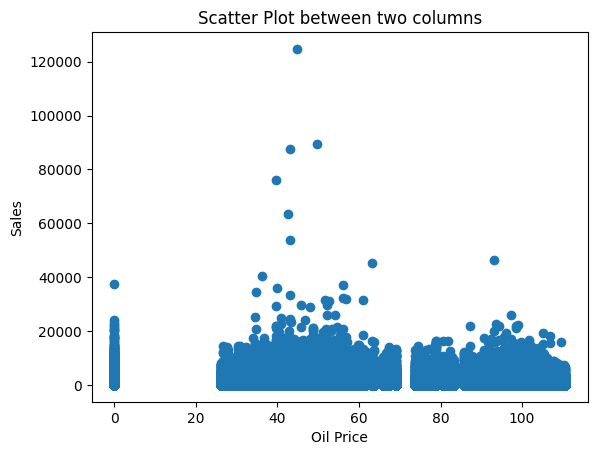

In [0]:

# Collect the data for the two columns
data_to_plot = df.select('sales', 'dcoilwtico').collect()

# Extract values for plotting
x = [row['dcoilwtico'] for row in data_to_plot]
y = [row['sales'] for row in data_to_plot]

# Plotting a scatter plot using Matplotlib
plt.scatter(x, y)
plt.xlabel('Oil Price')
plt.ylabel('Sales')
plt.title('Scatter Plot between two columns')
plt.show()

In [0]:
df.describe()

DataFrame[summary: string, dcoilwtico: string, id: string, store_nbr: string, family: string, sales: string, onpromotion: string]

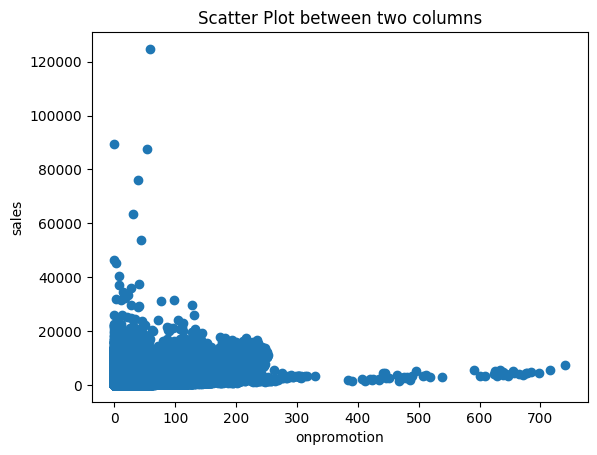

In [0]:
# Collect the data for the two columns
data_to_plot = df.select('sales', 'onpromotion').collect()

# Extract values for plotting
x = [row['onpromotion'] for row in data_to_plot]
y = [row['sales'] for row in data_to_plot]

# Plotting a scatter plot using Matplotlib
plt.scatter(x, y)
plt.xlabel('onpromotion')
plt.ylabel('sales')
plt.title('Scatter Plot between two columns')
plt.show()

In [0]:
display(df)

date dcoilwtico id store_nbr family sales onpromotion 2013-01-01 0.0 0 1 AUTOMOTIVE 0.0 0.0 2013-01-01 0.0 1 1 BABY CARE 0.0 0.0 2013-01-01 0.0 2 1 BEAUTY 0.0 0.0 2013-01-01 0.0 3 1 BEVERAGES 0.0 0.0 2013-01-01 0.0 4 1 BOOKS 0.0 0.0 2013-01-01 0.0 5 1 BREAD/BAKERY 0.0 0.0 2013-01-01 0.0 6 1 CELEBRATION 0.0 0.0 2013-01-01 0.0 7 1 CLEANING 0.0 0.0 2013-01-01 0.0 8 1 DAIRY 0.0 0.0 2013-01-01 0.0 9 1 DELI 0.0 0.0 2013-01-01 0.0 10 1 EGGS 0.0 0.0 2013-01-01 0.0 11 1 FROZEN FOODS 0.0 0.0 2013-01-01 0.0 12 1 GROCERY I 0.0 0.0 2013-01-01 0.0 13 1 GROCERY II 0.0 0.0 2013-01-01 0.0 14 1 HARDWARE 0.0 0.0 2013-01-01 0.0 15 1 HOME AND KITCHEN I 0.0 0.0 2013-01-01 0.0 16 1 HOME AND KITCHEN II 0.0 0.0 2013-01-01 0.0 17 1 HOME APPLIANCES 0.0 0.0 2013-01-01 0.0 18 1 HOME CARE 0.0 0.0 2013-01-01 0.0 19 1 LADIESWEAR 0.0 0.0 2013-01-01 0.0 20 1 LAWN AND GARDEN 0.0 0.0 2013-01-01 0.0 21 1 LINGERIE 0.0 0.0 2013-01-01 0.0 22 1 LIQUOR,WINE,BEER 0.0 0.0 2013-01-01 0.0 23 1 MAGAZINES 0.0 0.0 2013-01-01 0.0 24 1 MEATS 0.0 0.0 2013-01-01 0.0 25 1 PERSONAL CARE 0.0 0.0 2013-01-01 0.0 26 1 PET SUPPLIES 0.0 0.0 2013-01-01 0.0 27 1 PLAYERS AND ELECTRONICS 0.0 0.0 2013-01-01 0.0 28 1 POULTRY 0.0 0.0 2013-01-01 0.0 29 1 PREPARED FOODS 0.0 0.0 2013-01-01 0.0 30 1 PRODUCE 0.0 0.0 2013-01-01 0.0 31 1 SCHOOL AND OFFICE SUPPLIES 0.0 0.0 2013-01-01 0.0 32 1 SEAFOOD 0.0 0.0 2013-01-01 0.0 33 10 AUTOMOTIVE 0.0 0.0 2013-01-01 0.0 34 10 BABY CARE 0.0 0.0 2013-01-01 0.0 35 10 BEAUTY 0.0 0.0 2013-01-01 0.0 36 10 BEVERAGES 0.0 0.0 2013-01-01 0.0 37 10 BOOKS 0.0 0.0 2013-01-01 0.0 38 10 BREAD/BAKERY 0.0 0.0 2013-01-01 0.0 39 10 CELEBRATION 0.0 0.0 2013-01-01 0.0 40 10 CLEANING 0.0 0.0 2013-01-01 0.0 41 10 DAIRY 0.0 0.0 2013-01-01 0.0 42 10 DELI 0.0 0.0 2013-01-01 0.0 43 10 EGGS 0.0 0.0 2013-01-01 0.0 44 10 FROZEN FOODS 0.0 0.0 2013-01-01 0.0 45 10 GROCERY I 0.0 0.0 2013-01-01 0.0 46 10 GROCERY II 0.0 0.0 2013-01-01 0.0 47 10 HARDWARE 0.0 0.0 2013-01-01 0.0 48 10 HOME AND KITCHEN I 0.0 0.0 2013-01-01 0.0 49 10 HOME AND KITCHEN II 0.0 0.0 2013-01-01 0.0 50 10 HOME APPLIANCES 0.0 0.0 2013-01-01 0.0 51 10 HOME CARE 0.0 0.0 2013-01-01 0.0 52 10 LADIESWEAR 0.0 0.0 2013-01-01 0.0 53 10 LAWN AND GARDEN 0.0 0.0 2013-01-01 0.0 54 10 LINGERIE 0.0 0.0 2013-01-01 0.0 55 10 LIQUOR,WINE,BEER 0.0 0.0 2013-01-01 0.0 56 10 MAGAZINES 0.0 0.0 2013-01-01 0.0 57 10 MEATS 0.0 0.0 2013-01-01 0.0 58 10 PERSONAL CARE 0.0 0.0 2013-01-01 0.0 59 10 PET SUPPLIES 0.0 0.0 2013-01-01 0.0 60 10 PLAYERS AND ELECTRONICS 0.0 0.0 2013-01-01 0.0 61 10 POULTRY 0.0 0.0 2013-01-01 0.0 62 10 PREPARED FOODS 0.0 0.0 2013-01-01 0.0 63 10 PRODUCE 0.0 0.0 2013-01-01 0.0 64 10 SCHOOL AND OFFICE SUPPLIES 0.0 0.0 2013-01-01 0.0 65 10 SEAFOOD 0.0 0.0 2013-01-01 0.0 66 11 AUTOMOTIVE 0.0 0.0 2013-01-01 0.0 67 11 BABY CARE 0.0 0.0 2013-01-01 0.0 68 11 BEAUTY 0.0 0.0 2013-01-01 0.0 69 11 BEVERAGES 0.0 0.0 2013-01-01 0.0 70 11 BOOKS 0.0 0.0 2013-01-01 0.0 71 11 BREAD/BAKERY 0.0 0.0 2013-01-01 0.0 72 11 CELEBRATION 0.0 0.0 2013-01-01 0.0 73 11 CLEANING 0.0 0.0 2013-01-01 0.0 74 11 DAIRY 0.0 0.0 2013-01-01 0.0 75 11 DELI 0.0 0.0 2013-01-01 0.0 76 11 EGGS 0.0 0.0 2013-01-01 0.0 77 11 FROZEN FOODS 0.0 0.0 2013-01-01 0.0 78 11 GROCERY I 0.0 0.0 2013-01-01 0.0 79 11 GROCERY II 0.0 0.0 2013-01-01 0.0 80 11 HARDWARE 0.0 0.0 2013-01-01 0.0 81 11 HOME AND KITCHEN I 0.0 0.0 2013-01-01 0.0 82 11 HOME AND KITCHEN II 0.0 0.0 2013-01-01 0.0 83 11 HOME APPLIANCES 0.0 0.0 2013-01-01 0.0 84 11 HOME CARE 0.0 0.0 2013-01-01 0.0 85 11 LADIESWEAR 0.0 0.0 2013-01-01 0.0 86 11 LAWN AND GARDEN 0.0 0.0 2013-01-01 0.0 87 11 LINGERIE 0.0 0.0 2013-01-01 0.0 88 11 LIQUOR,WINE,BEER 0.0 0.0 2013-01-01 0.0 89 11 MAGAZINES 0.0 0.0 2013-01-01 0.0 90 11 MEATS 0.0 0.0 2013-01-01 0.0 91 11 PERSONAL CARE 0.0 0.0 2013-01-01 0.0 92 11 PET SUPPLIES 0.0 0.0 2013-01-01 0.0 93 11 PLAYERS AND ELECTRONICS 0.0 0.0 2013-01-01 0.0 94 11 POULTRY 0.0 0.0 2013-01-01 0.0 95 11 PREPARED FOODS 0.0 0.0 2013-01-01 0.0 96 11 PRODUCE 0.0 0.0 2013-01-01 0.0 97 11 SCHOOL AND OFFICE SUPPLIES

In [0]:
new_df=df.withColumn("sales", col("sales").cast("double"))
new_df=df.withColumn("onpromotion", col("onpromotion").cast("double"))
new_df=df.withColumn("dcoilwtico", col("dcoilwtico").cast("double"))

In [0]:
#grouped_df = df.groupBy("family")
#grouped_df = df.groupBy("family").agg(sum("sales").alias("Total"))

new_df.printSchema()

root
 |-- date: date (nullable = true)
 |-- dcoilwtico: double (nullable = true)
 |-- id: integer (nullable = true)
 |-- store_nbr: integer (nullable = true)
 |-- family: string (nullable = true)
 |-- sales: integer (nullable = true)
 |-- onpromotion: double (nullable = true)



In [0]:
grouped_df = df.groupBy("family")


GroupedData[grouping expressions: [family], value: [date: date, dcoilwtico: double ... 5 more fields], type: GroupBy]

In [0]:
from pyspark.sql.functions import count, avg,sum


In [0]:
new_df = new_df.withColumn("sales", col("sales").cast("double"))
grouped_df = new_df.groupBy("family").agg(sum("sales").alias("Average"))

In [0]:
grouped_df.show()

+-------------------+------------+
|             family|     Average|
+-------------------+------------+
|     PREPARED FOODS|   5673739.0|
|HOME AND KITCHEN II|    959392.0|
|         LADIESWEAR|    358232.0|
|    LAWN AND GARDEN|    349966.0|
|          GROCERY I|2.20112697E8|
|          BABY CARE|      6619.0|
|            PRODUCE| 8.2896425E7|
|         AUTOMOTIVE|    341081.0|
|          BEVERAGES|1.35250279E8|
|          HOME CARE| 1.0034306E7|
|       BREAD/BAKERY| 2.7158467E7|
|              BOOKS|      4436.0|
|           LINGERIE|    425798.0|
|        CELEBRATION|    500037.0|
|         GROCERY II|   1298723.0|
|              DAIRY|  4.104062E7|
|          MAGAZINES|    165367.0|
|            SEAFOOD|   1302279.0|
|   LIQUOR,WINE,BEER|   5070932.0|
| HOME AND KITCHEN I|   1230268.0|
+-------------------+------------+
only showing top 20 rows



## Energy-prediction Data Set

## NFL Data Set